In [40]:
# inline plotting
%matplotlib inline

# allow live package editing
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import numpy as np
import matplotlib.pyplot as plt

import eemeter

print(f"eemeter {eemeter.__version__}")

eemeter 4.0.5


In [42]:

# contains baseline and reporting data for 100 meters
df_baseline, df_reporting =  eemeter.load_test_data("daily_treatment_data")

In [43]:
df_baseline

temperature      observed
id     datetime                                            
108618 2018-01-01 00:00:00-06:00    -2.384038  16635.193673
       2018-01-02 00:00:00-06:00     1.730000  15594.051162
       2018-01-03 00:00:00-06:00    13.087946  11928.025899
       2018-01-04 00:00:00-06:00     4.743269  14399.333812
       2018-01-05 00:00:00-06:00     4.130577  14315.101721
...                                       ...           ...
120841 2018-12-27 00:00:00-06:00    52.010625   1153.749811
       2018-12-28 00:00:00-06:00    35.270000   1704.076968
       2018-12-29 00:00:00-06:00    29.630000   2151.225729
       2018-12-30 00:00:00-06:00    34.250000   1331.123954
       2018-12-31 00:00:00-06:00    43.311250   1723.397349

[36500 rows x 2 columns]

In [44]:
df_reporting

temperature     observed
id     datetime                                           
108618 2019-01-01 00:00:00-06:00    -2.384038  9294.220619
       2019-01-02 00:00:00-06:00     1.730000  8073.766329
       2019-01-03 00:00:00-06:00    13.087946  5261.174665
       2019-01-04 00:00:00-06:00     4.743269  6775.499525
       2019-01-05 00:00:00-06:00     4.130577  6735.513000
...                                       ...          ...
120841 2019-12-27 00:00:00-06:00    52.010625   867.424857
       2019-12-28 00:00:00-06:00    35.270000  1355.458931
       2019-12-29 00:00:00-06:00    29.630000  1627.092533
       2019-12-30 00:00:00-06:00    34.250000  1034.703100
       2019-12-31 00:00:00-06:00    43.311250  1196.767320

[36500 rows x 2 columns]

In [45]:
df_baseline_108618 = df_baseline.loc[108618]
df_baseline_108618

,temperature,observed
datetime,,
2018-01-01 00:00:00-06:00,-2.384038,16635.193673
2018-01-02 00:00:00-06:00,1.730000,15594.051162
2018-01-03 00:00:00-06:00,13.087946,11928.025899
2018-01-04 00:00:00-06:00,4.743269,14399.333812
2018-01-05 00:00:00-06:00,4.130577,14315.101721
...,...,...
2018-12-27 00:00:00-06:00,46.602066,4528.347029
2018-12-28 00:00:00-06:00,38.346724,5647.646228
2018-12-29 00:00:00-06:00,28.614456,5338.377496


In [46]:
df_reporting_108618 = df_reporting.loc[108618]
df_reporting_108618

,temperature,observed
datetime,,
2019-01-01 00:00:00-06:00,-2.384038,9294.220619
2019-01-02 00:00:00-06:00,1.730000,8073.766329
2019-01-03 00:00:00-06:00,13.087946,5261.174665
2019-01-04 00:00:00-06:00,4.743269,6775.499525
2019-01-05 00:00:00-06:00,4.130577,6735.513000
...,...,...
2019-12-27 00:00:00-06:00,46.602066,1844.233939
2019-12-28 00:00:00-06:00,38.346724,2342.293565
2019-12-29 00:00:00-06:00,28.614456,1977.683581


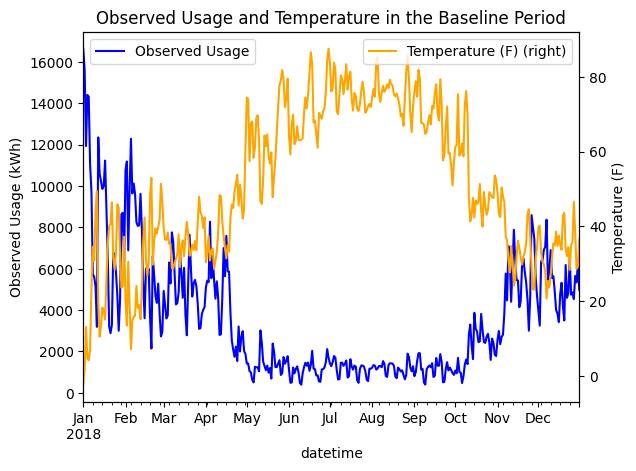

In [47]:
ax = df_baseline_108618['observed'].plot(label='Observed Usage', color='blue')
df_baseline_108618['temperature'].plot(ax=ax, secondary_y=True, label='Temperature (F)', color='orange')

ax.set_ylabel('Observed Usage (kWh)')
ax.right_ax.set_ylabel('Temperature (F)')

ax.legend(loc='upper left')
ax.right_ax.legend(loc='upper right')

plt.title('Observed Usage and Temperature in the Baseline Period')
plt.savefig('baseline_data_daily.png')
plt.show()

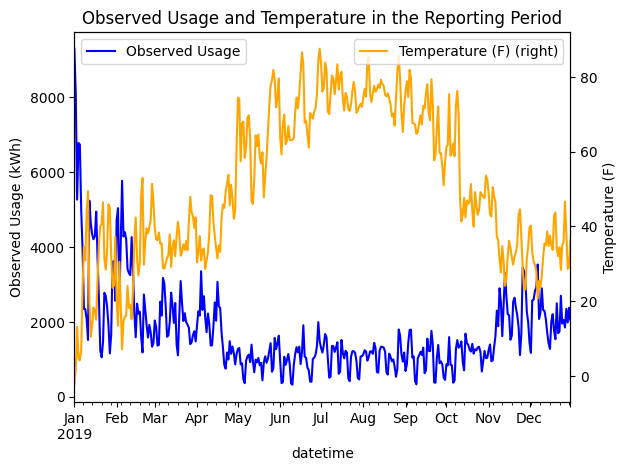

In [48]:
ax = df_reporting_108618['observed'].plot(label='Observed Usage', color='blue')
df_reporting_108618['temperature'].plot(ax=ax, secondary_y=True, label='Temperature (F)', color='orange')

ax.set_ylabel('Observed Usage (kWh)')
ax.right_ax.set_ylabel('Temperature (F)')

ax.legend(loc='upper left')
ax.right_ax.legend(loc='upper right')

plt.title('Observed Usage and Temperature in the Reporting Period')
plt.savefig('reporting_data_daily.png')
plt.show()

In [49]:
baseline_data = eemeter.eemeter.DailyBaselineData(df_baseline_108618, is_electricity_data=True)
reporting_data = eemeter.eemeter.DailyReportingData(df_reporting_108618, is_electricity_data=True)

In [50]:
# note that you can also create these objects from individual series instead of a single dataframe
baseline_data = eemeter.eemeter.DailyBaselineData.from_series(df_baseline_108618['observed'], df_baseline_108618['temperature'], is_electricity_data=True)

In [51]:
print(f"Disqualifications: {baseline_data.disqualification}")
print(f"Warnings:          {baseline_data.warnings}")

Disqualifications: []
Warnings:          [EEMeterWarning(qualified_name=eemeter.sufficiency_criteria.unable_to_confirm_daily_temperature_sufficiency), EEMeterWarning(qualified_name=eemeter.sufficiency_criteria.extreme_values_detected)]


In [52]:
# can also access the underlying dataframe like so (note that this is a copy)
baseline_data.df.head()

,season,weekday_weekend,temperature,observed
datetime,,,,
2018-01-01 00:00:00-06:00,winter,weekday,-2.384038,16635.193673
2018-01-02 00:00:00-06:00,winter,weekday,1.730000,15594.051162
2018-01-03 00:00:00-06:00,winter,weekday,13.087946,11928.025899
2018-01-04 00:00:00-06:00,winter,weekday,4.743269,14399.333812
2018-01-05 00:00:00-06:00,winter,weekday,4.130577,14315.101721


All models follow the same general format of:

- Initialize
- Fit
- Predict

We can initialize and fit in the same line (like below) as a shorthand or this can be done in separate steps

In [53]:
daily_model = eemeter.eemeter.DailyModel()
daily_model.fit(baseline_data)

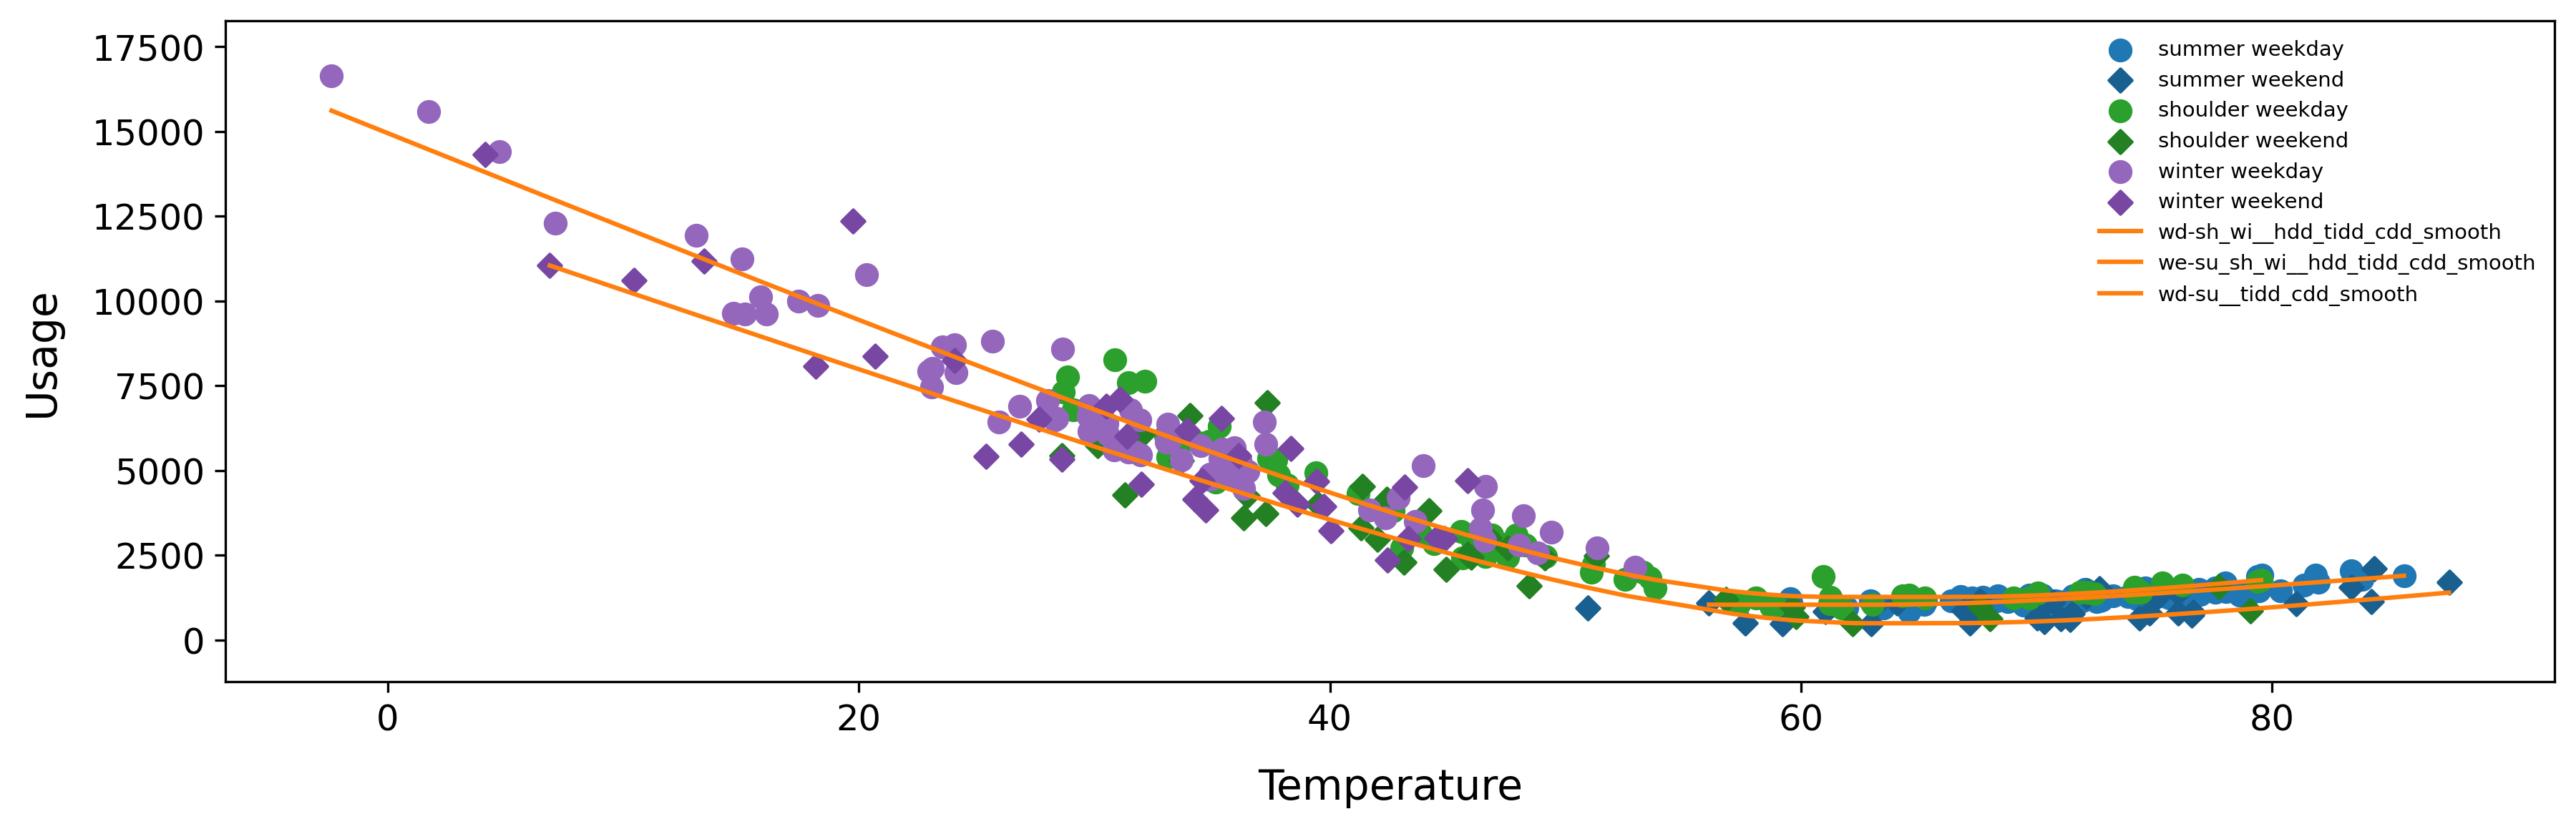

In [54]:
daily_model.plot(baseline_data)

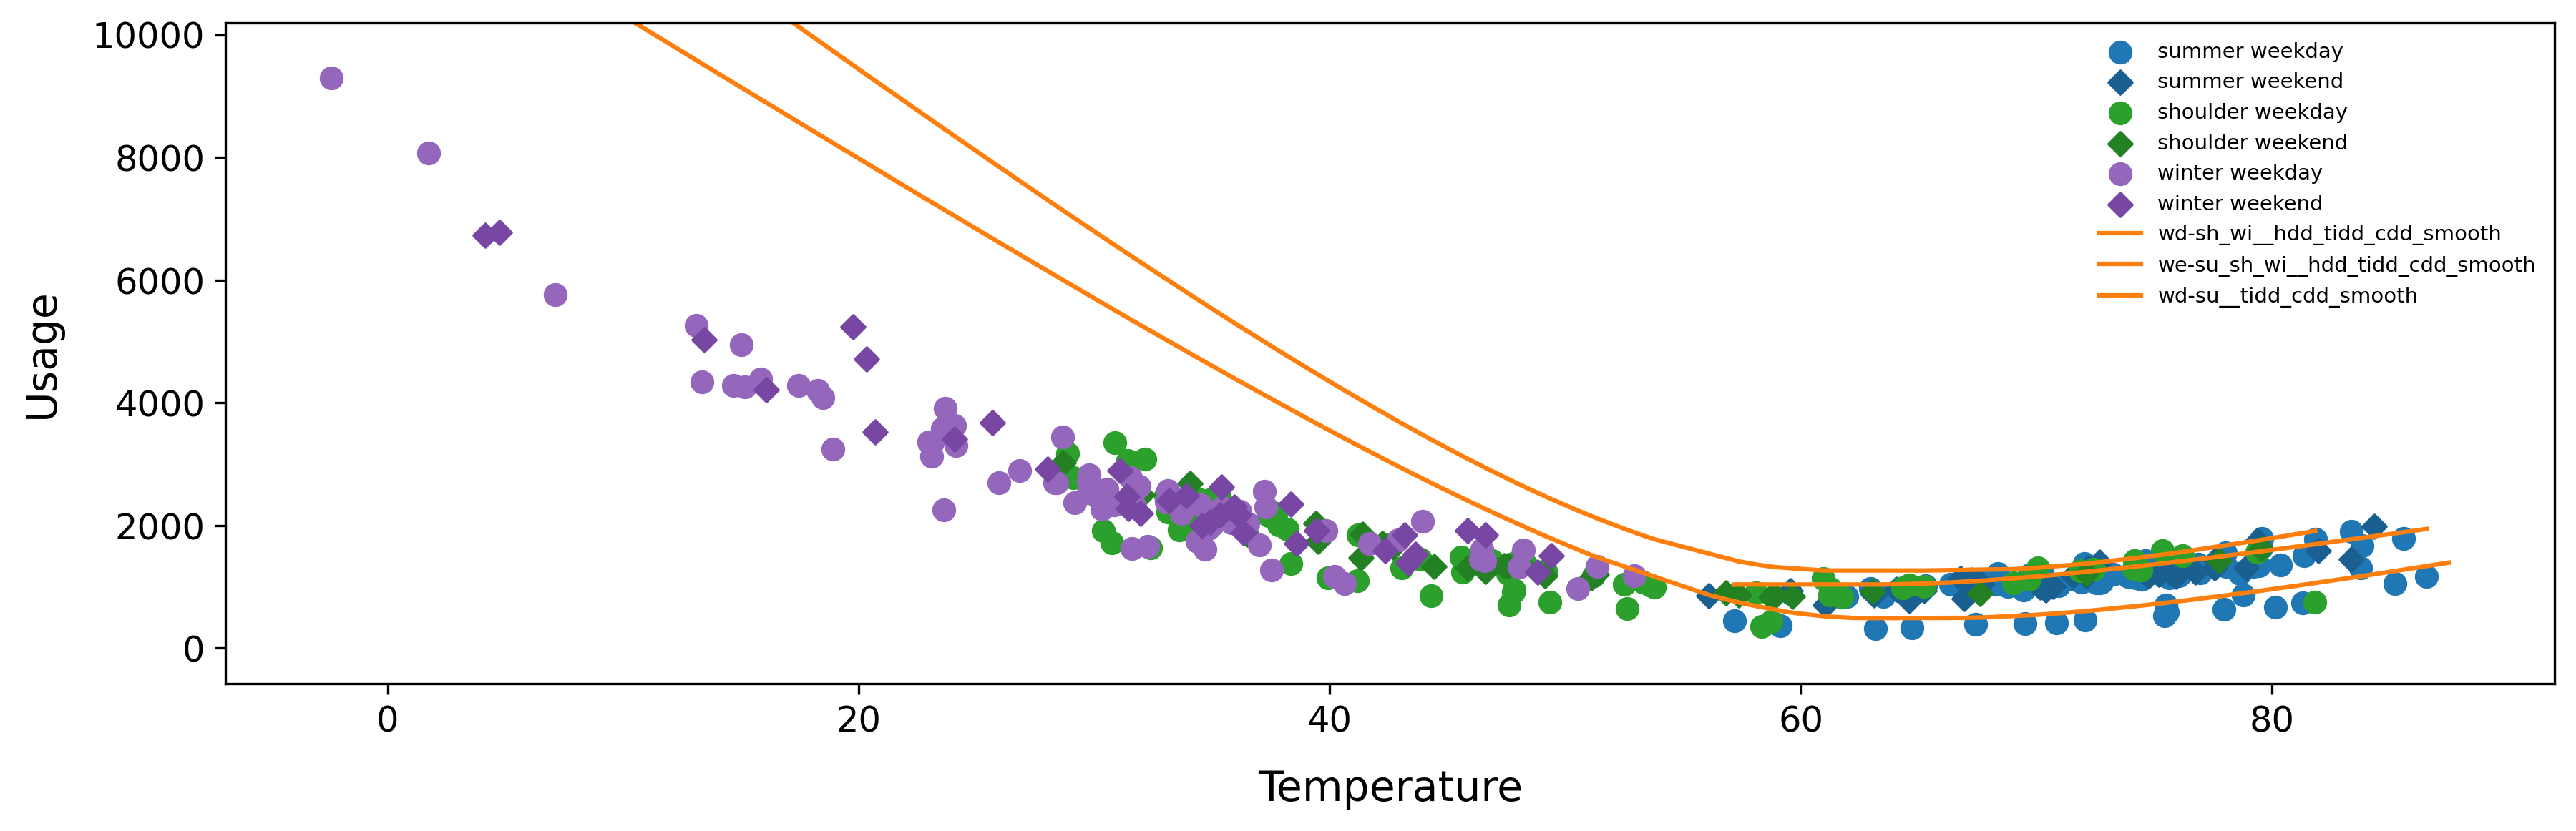

In [55]:
daily_model.plot(reporting_data)

In [56]:
df_results = daily_model.predict(reporting_data)
df_results.head()

,season,day_of_week,weekday_weekend,temperature,observed,predicted,predicted_unc,heating_load,cooling_load,model_split,model_type
datetime,,,,,,,,,,,
2019-01-01 00:00:00-06:00,winter,2,weekday,-2.384038,9294.220619,15610.330791,1181.674285,14344.873494,0.0,wd-sh_wi,hdd_tidd_cdd_smooth
2019-01-02 00:00:00-06:00,winter,3,weekday,1.730000,8073.766329,14464.613486,1181.674285,13199.156189,0.0,wd-sh_wi,hdd_tidd_cdd_smooth
2019-01-03 00:00:00-06:00,winter,4,weekday,13.087946,5261.174665,11322.966704,1181.674285,10057.509407,0.0,wd-sh_wi,hdd_tidd_cdd_smooth
2019-01-04 00:00:00-06:00,winter,5,weekday,4.743269,6775.499525,13627.487003,1181.674285,12362.029706,0.0,wd-sh_wi,hdd_tidd_cdd_smooth
2019-01-05 00:00:00-06:00,winter,6,weekend,4.130577,6735.513000,11690.139993,1224.574703,11200.780385,0.0,we-su_sh_wi,hdd_tidd_cdd_smooth


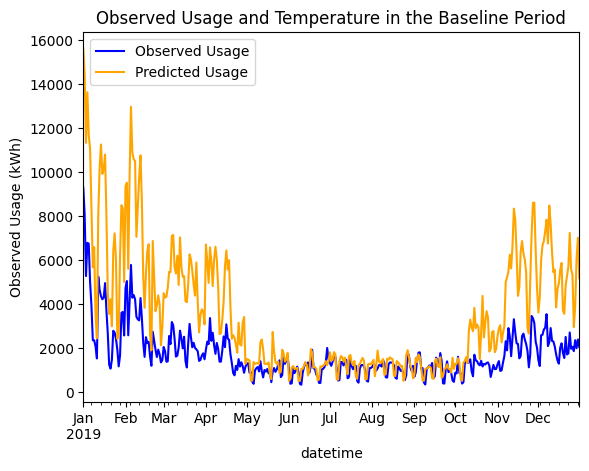

In [57]:
ax = df_results['observed'].plot(label='Observed Usage', color='blue')
df_results['predicted'].plot(ax=ax, label='Predicted Usage', color='orange')

ax.set_ylabel('Observed Usage (kWh)')
ax.legend(loc='upper left')
plt.title('Observed Usage and Temperature in the Baseline Period')
plt.savefig('predicted_vs_observed_daily.png')
plt.show()

In [82]:
df_results['savings'] = df_results['predicted'] - df_results['observed']
print(f"Predicted Usage (kWh):  {round(df_results['predicted'].sum(), 2)}")
print(f"Observed Usage (kWh):   {round(df_results['observed'].sum(), 2)}")
print(f"Savings (kWh):          {round(df_results['savings'].sum(), 2)}")


Predicted Usage (kWh):  1297651.07
Observed Usage (kWh):   632077.62
Savings (kWh):          665573.45


Model Serialization

In [59]:
saved_model = daily_model.to_json()
print(saved_model)

{"submodels": {"wd-su": {"coefficients": {"model_type": "tidd_cdd_smooth", "intercept": 1036.62605016263, "hdd_bp": null, "hdd_beta": null, "hdd_k": null, "cdd_bp": 63.112946428571426, "cdd_beta": 55.8938901507189, "cdd_k": 7.610345707770536}, "temperature_constraints": {"T_min": 56.096346153846156, "T_max": 85.60365384615385, "T_min_seg": 63.112946428571426, "T_max_seg": 81.97444606863725}, "f_unc": 287.2717928729389}, "wd-sh_wi": {"coefficients": {"model_type": "hdd_tidd_cdd_smooth", "intercept": 1265.4572967952768, "hdd_bp": 48.66708982684446, "hdd_beta": 280.56118289086174, "hdd_k": 0.4861025625521579, "cdd_bp": 74.4246153846154, "cdd_beta": 76.12622638483967, "cdd_k": 0.2941773382321021}, "temperature_constraints": {"T_min": -2.3840384615384616, "T_max": 79.53846153846153, "T_min_seg": 13.432307692307694, "T_max_seg": 74.4246153846154}, "f_unc": 1181.6742853434923}, "we-su_sh_wi": {"coefficients": {"model_type": "hdd_tidd_cdd_smooth", "intercept": 489.35960795932726, "hdd_bp": 51.

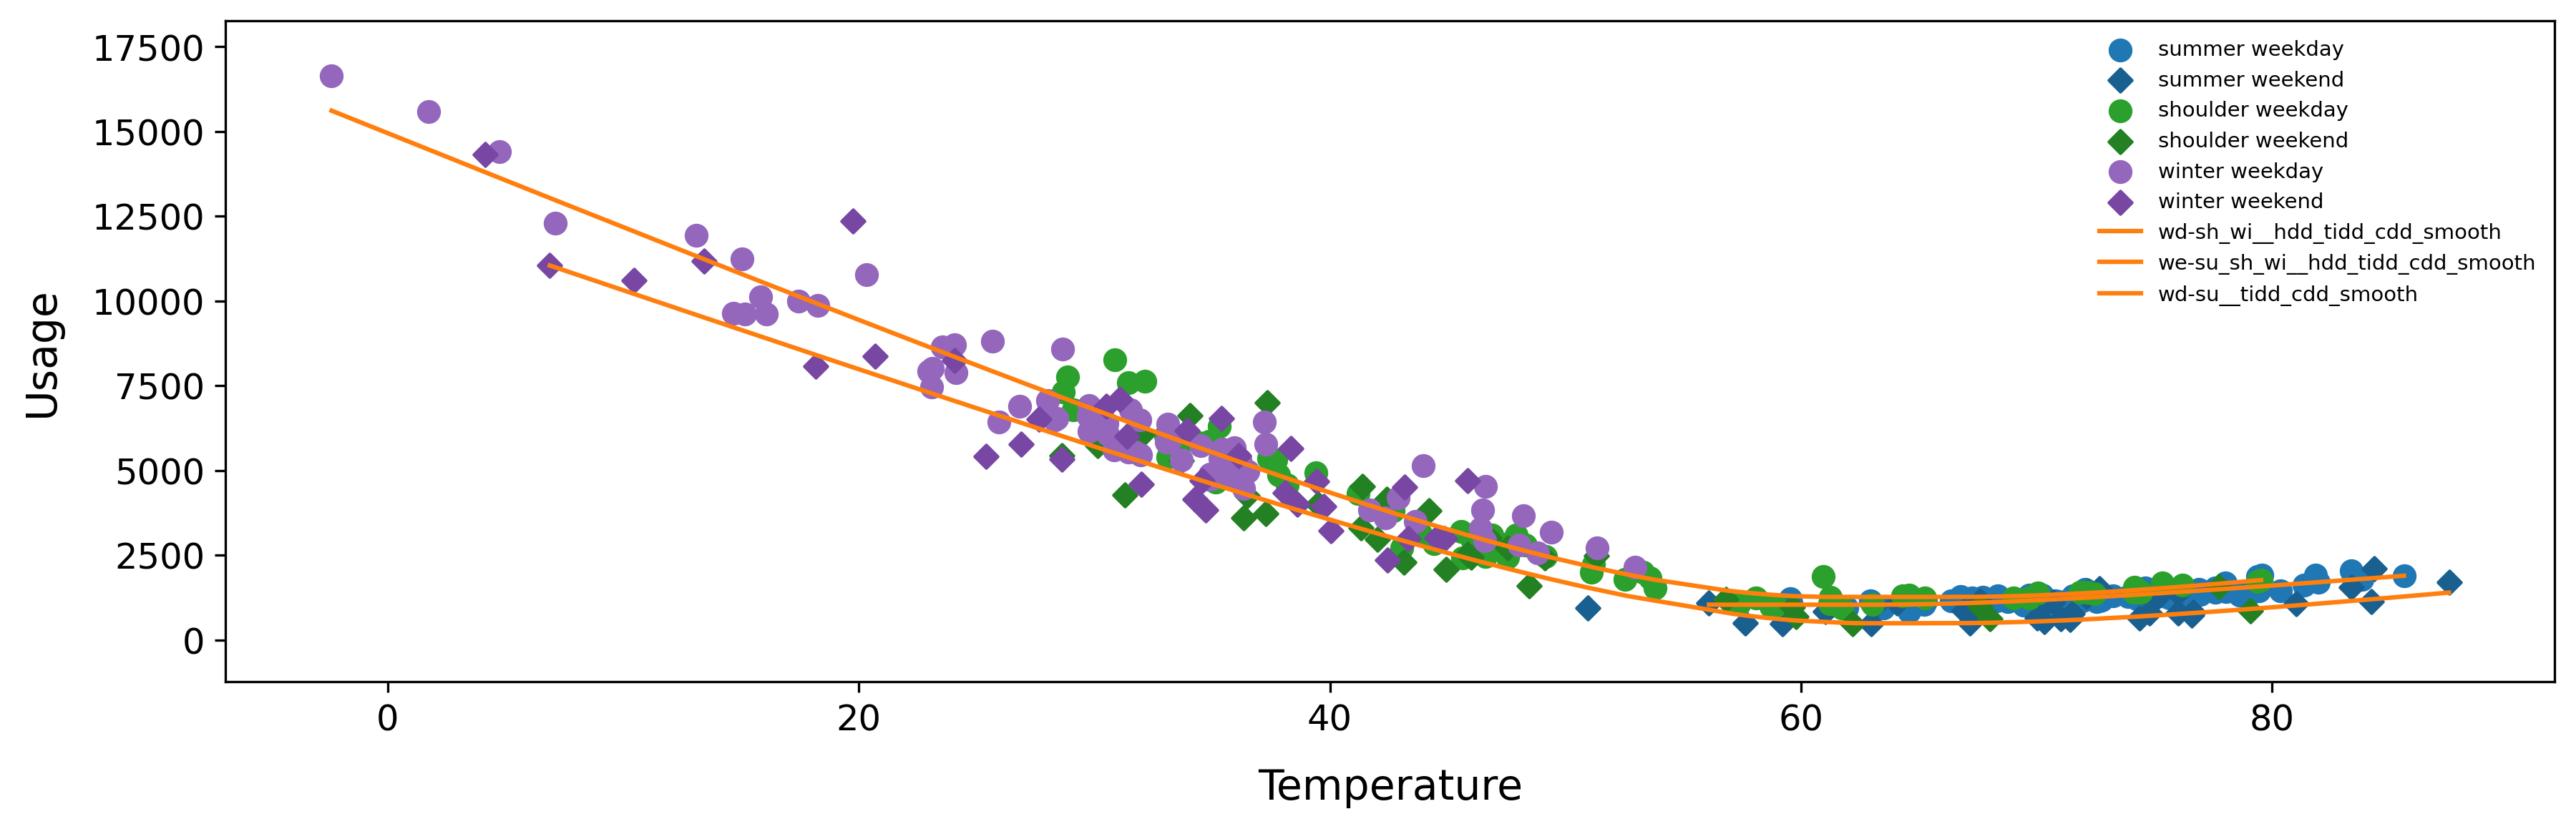

In [60]:
loaded_model = eemeter.eemeter.DailyModel.from_json(saved_model)
loaded_model.plot(baseline_data)

In [61]:
# dq'd meters - adding nans

df_baseline_dq = baseline_data.df
df_baseline_dq.loc[df_baseline_dq.index[1:37], "observed"] = np.nan

daily_baseline_data_DQ = eemeter.eemeter.DailyBaselineData(df_baseline_dq, is_electricity_data=True)

In [62]:
print(f"Disqualifications: {daily_baseline_data_DQ.disqualification}")
print(f"Warnings:          {daily_baseline_data_DQ.warnings}")

Disqualifications: [EEMeterWarning(qualified_name=eemeter.sufficiency_criteria.too_many_days_with_missing_data), EEMeterWarning(qualified_name=eemeter.sufficiency_criteria.too_many_days_with_missing_meter_data)]
Warnings:          [EEMeterWarning(qualified_name=eemeter.sufficiency_criteria.unable_to_confirm_daily_temperature_sufficiency), EEMeterWarning(qualified_name=eemeter.sufficiency_criteria.extreme_values_detected)]


Baseline model section

Note that the only difference in how these are called are the specific data classes and model used. Everything else remains the same.

- still has daily temp, but observed only present once per month


In [64]:
df_baseline, df_reporting = eemeter.load_test_data("monthly_treatment_data")

In [67]:
print(df_baseline)

                                  temperature       observed
id     datetime                                             
108618 2018-01-01 00:00:00-06:00    -2.384038  257406.539278
       2018-01-02 00:00:00-06:00     1.730000            NaN
       2018-01-03 00:00:00-06:00    13.087946            NaN
       2018-01-04 00:00:00-06:00     4.743269            NaN
       2018-01-05 00:00:00-06:00     4.130577            NaN
...                                       ...            ...
120841 2018-12-27 00:00:00-06:00    52.010625            NaN
       2018-12-28 00:00:00-06:00    35.270000            NaN
       2018-12-29 00:00:00-06:00    29.630000            NaN
       2018-12-30 00:00:00-06:00    34.250000            NaN
       2018-12-31 00:00:00-06:00    43.311250            NaN

[36500 rows x 2 columns]


In [68]:
print(df_reporting)

                                  temperature       observed
id     datetime                                             
108618 2019-01-01 00:00:00-06:00    -2.384038  113307.827517
       2019-01-02 00:00:00-06:00     1.730000            NaN
       2019-01-03 00:00:00-06:00    13.087946            NaN
       2019-01-04 00:00:00-06:00     4.743269            NaN
       2019-01-05 00:00:00-06:00     4.130577            NaN
...                                       ...            ...
120841 2019-12-27 00:00:00-06:00    52.010625            NaN
       2019-12-28 00:00:00-06:00    35.270000            NaN
       2019-12-29 00:00:00-06:00    29.630000            NaN
       2019-12-30 00:00:00-06:00    34.250000            NaN
       2019-12-31 00:00:00-06:00    43.311250            NaN

[36500 rows x 2 columns]


In [69]:
df_baseline_108618 = df_baseline.loc[108618]
df_baseline_108618

,temperature,observed
datetime,,
2018-01-01 00:00:00-06:00,-2.384038,257406.539278
2018-01-02 00:00:00-06:00,1.730000,NaN
2018-01-03 00:00:00-06:00,13.087946,NaN
2018-01-04 00:00:00-06:00,4.743269,NaN
2018-01-05 00:00:00-06:00,4.130577,NaN
...,...,...
2018-12-27 00:00:00-06:00,46.602066,NaN
2018-12-28 00:00:00-06:00,38.346724,NaN
2018-12-29 00:00:00-06:00,28.614456,NaN


In [70]:
df_reporting_108618 = df_reporting.loc[108618]
df_reporting_108618

,temperature,observed
datetime,,
2019-01-01 00:00:00-06:00,-2.384038,113307.827517
2019-01-02 00:00:00-06:00,1.730000,NaN
2019-01-03 00:00:00-06:00,13.087946,NaN
2019-01-04 00:00:00-06:00,4.743269,NaN
2019-01-05 00:00:00-06:00,4.130577,NaN
...,...,...
2019-12-27 00:00:00-06:00,46.602066,NaN
2019-12-28 00:00:00-06:00,38.346724,NaN
2019-12-29 00:00:00-06:00,28.614456,NaN


In [77]:
billing_baseline_data = eemeter.eemeter.BillingBaselineData(df_baseline_108618, is_electricity_data=True)
billing_reporting_data = eemeter.eemeter.BillingReportingData(df_reporting_108618, is_electricity_data=True)

In [78]:
# notice that the observed usage for each day is automatically spread evenly from the monthly usage provided
print(billing_baseline_data.df)

,season,weekday_weekend,temperature,observed
datetime,,,,
2018-01-01 00:00:00-06:00,winter,weekday,-2.384038,8303.436751
2018-01-02 00:00:00-06:00,winter,weekday,1.730000,8303.436751
2018-01-03 00:00:00-06:00,winter,weekday,13.087946,8303.436751
2018-01-04 00:00:00-06:00,winter,weekday,4.743269,8303.436751
2018-01-05 00:00:00-06:00,winter,weekday,4.130577,8303.436751
...,...,...,...,...
2018-12-27 00:00:00-06:00,winter,weekday,46.602066,5288.700172
2018-12-28 00:00:00-06:00,winter,weekday,38.346724,5288.700172
2018-12-29 00:00:00-06:00,winter,weekend,28.614456,5288.700172


In [85]:
billing_model = eemeter.eemeter.BillingModel().fit(billing_baseline_data, ignore_disqualification=False)
billing_model.predict(billing_reporting_data).head()

,season,day_of_week,weekday_weekend,temperature,observed,predicted,predicted_unc,heating_load,cooling_load,model_split,model_type
datetime,,,,,,,,,,,
2019-01-01 00:00:00-06:00,winter,2,weekday,-2.384038,3655.09121,9733.728179,2316.237742,8530.919994,0.0,fw-su_sh_wi,hdd_tidd_cdd
2019-01-02 00:00:00-06:00,winter,3,weekday,1.730000,3655.09121,9235.507988,2316.237742,8032.699803,0.0,fw-su_sh_wi,hdd_tidd_cdd
2019-01-03 00:00:00-06:00,winter,4,weekday,13.087946,3655.09121,7860.032700,2316.237742,6657.224516,0.0,fw-su_sh_wi,hdd_tidd_cdd
2019-01-04 00:00:00-06:00,winter,5,weekday,4.743269,3655.09121,8870.593662,2316.237742,7667.785478,0.0,fw-su_sh_wi,hdd_tidd_cdd
2019-01-05 00:00:00-06:00,winter,6,weekend,4.130577,3655.09121,8944.792210,2316.237742,7741.984025,0.0,fw-su_sh_wi,hdd_tidd_cdd


The billing model prediction function does have additional functionality built into it where it can aggregate from averaged daily data to `monthly` or `bimonthly`

In [86]:
billing_model.predict(billing_reporting_data, aggregation="monthly")


,season,temperature,observed,predicted,predicted_unc,heating_load,cooling_load,model_split,model_type
datetime,,,,,,,,,
2019-01-01 00:00:00-06:00,winter,25.612211,113307.827517,196642.717137,12896.265955,159355.663417,0.000000,fw-su_sh_wi,hdd_tidd_cdd
2019-02-01 00:00:00-06:00,winter,29.523429,81056.766022,164350.346292,12256.378085,130671.717126,0.000000,fw-su_sh_wi,hdd_tidd_cdd
2019-03-01 00:00:00-06:00,shoulder,36.122525,62783.320515,157185.144004,12896.265955,119898.090284,0.000000,fw-su_sh_wi,hdd_tidd_cdd
2019-04-01 00:00:00-05:00,shoulder,40.599556,53542.223426,135849.270725,12686.556598,99765.025189,0.000000,fw-su_sh_wi,hdd_tidd_cdd
2019-05-01 00:00:00-05:00,shoulder,64.969863,31089.429512,59427.613500,12896.265955,22047.507990,93.051790,fw-su_sh_wi,hdd_tidd_cdd
2019-06-01 00:00:00-05:00,summer,70.262968,29346.533659,43017.949048,12686.556598,6801.829282,131.874231,fw-su_sh_wi,hdd_tidd_cdd
2019-07-01 00:00:00-05:00,summer,75.915400,32743.001296,37549.881062,12896.265955,0.000000,262.827342,fw-su_sh_wi,hdd_tidd_cdd
2019-08-01 00:00:00-05:00,summer,75.706736,33660.542162,38028.046427,12896.265955,480.770213,260.222494,fw-su_sh_wi,hdd_tidd_cdd
2019-09-01 00:00:00-05:00,summer,68.480234,30381.828023,46721.644687,12686.556598,10530.068712,107.330440,fw-su_sh_wi,hdd_tidd_cdd
